######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#c3b235">Receipt Digitization (OCR and Tesseract different ways)
    

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#54c335">Our Core Python Libraries
<font color=darkblue>   

In [1]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#54c335">Load Image file

In [2]:
# Read the image
img = cv2.imread('/home/jayanthikishore/Downloads/1012-receipt.jpg',0)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#c39b35">Display image

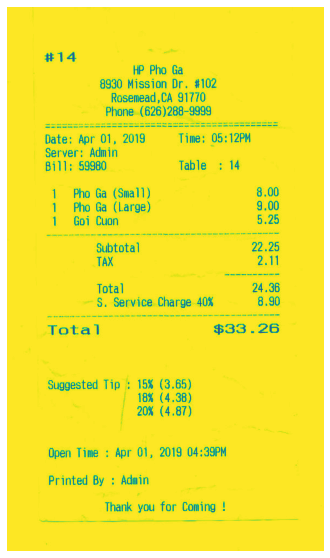

In [3]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')
plt.show()

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#c3ab35">Display image in original color

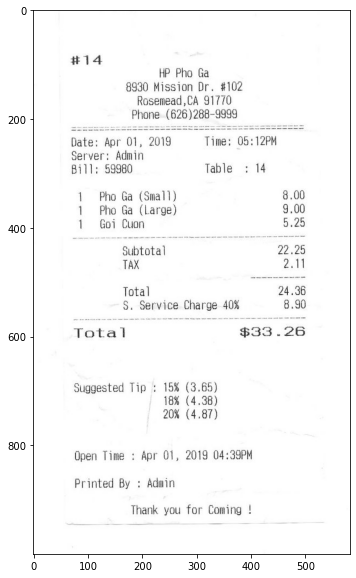

In [4]:
plt.figure(figsize=(10,10))
ret,thresh1 = cv2.threshold(img,210,255,cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#bac335">Text detection using Tessearct

In [5]:
import pytesseract
from pytesseract import Output
import cv2

img = cv2.imread('/home/jayanthikishore/Downloads/1012-receipt.jpg')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])    
    imgg = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)

# cv2.imshow(img,'img')

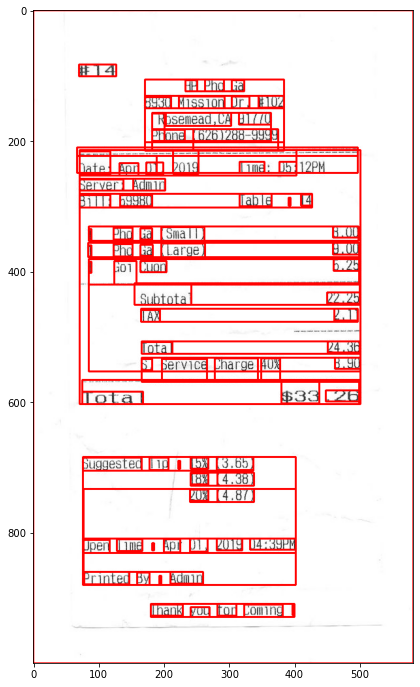

In [6]:
plt.figure(figsize=(10,12))
ret,thresh1 = cv2.threshold(imgg,210,255,cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(imgg, cv2.COLOR_BGR2RGB))
plt.show()

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#77c335">Text extraction from Image file

In [17]:
def ocr_core(filename):
    """
    This function will handle the core OCR processing of images.
    """
    text = pytesseract.image_to_string(Image.open(filename))  # We'll use Pillow's Image class to open the image and pytesseract to detect the string in the image
    return text

print(ocr_core('/home/jayanthikishore/Downloads/1012-receipt.jpg'))

#14
HP Pho Ga
8930 Mission Dr. #102
fone CA 91770
Phone (626)268- }-9999
bate: Apr 01, 2019 Time: 05:
Server: Admin

 

Bill; 59980 Table : 14

1 Pho Ga (Small) 8.00

1 Pho Ga (Large) 9.00

1 Goi Cuon 5.28
“Subtotal 22.25
TAX 211
Total 24.36
8. Bane Charge 40% 8.90

Total $33 -26

Suggested Tip ; 15% (3,65)
18% (4.38)
20% (4.87)

Open Time : Apr 01, 2019 04:39PM

Printed By : Admin

Thank you for Coming !



######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c356">Text extraction from Image file (different way)

In [7]:
import pytesseract
from PIL import Image, ImageEnhance, ImageFilter

im = Image.open("/home/jayanthikishore/Downloads/1012-receipt.jpg") # the second one 
im = im.filter(ImageFilter.MedianFilter())
enhancer = ImageEnhance.Contrast(im)
im = enhancer.enhance(2)
im = im.convert('1')
im.save('temp2.jpg')
text = pytesseract.image_to_string(Image.open('temp2.jpg'))
print(text)

HP Pho Ga
8930 Mission Or. 9102
Rasemead.CA 91770
Phone--(826) 288-9998
Date: Apr 61, 2019 Tine: 09: 12PK
Server: Admin
Bill: 59980 Table 2 14

 

i Pho Ga (Small)
1 Pho Ga (Large)

 

1 Goi Quan
Subtotal
TAX
Total 24.38
5. Service. Charge..408 8.90
Total $33 .26

Suggested Tip : 18% (3.65)

18% (4.38)

208 (4.87)
Open Time : Apr G1, 2049 04:39PH
Printed By : Adwin

Thank you for Coming |



######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c356">Text extraction from Image file (different way)

In [8]:
from pytesseract import image_to_string
from PIL import Image

im = Image.open('/home/jayanthikishore/Downloads/1012-receipt.jpg')
print(im)

print(image_to_string(im))


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=582x1000 at 0x7FD5805ABD60>
#14
HP Pho Ga
8930 Mission Dr. #102
fone CA 91770
Phone (626)268- }-9999
bate: Apr 01, 2019 Time: 05:
Server: Admin

 

Bill; 59980 Table : 14

1 Pho Ga (Small) 8.00

1 Pho Ga (Large) 9.00

1 Goi Cuon 5.28
“Subtotal 22.25
TAX 211
Total 24.36
8. Bane Charge 40% 8.90

Total $33 -26

Suggested Tip ; 15% (3,65)
18% (4.38)
20% (4.87)

Open Time : Apr 01, 2019 04:39PM

Printed By : Admin

Thank you for Coming !



######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c356">Text extraction from Image file (different way)

In [13]:
import cv2
import numpy as np
import pytesseract
from PIL import Image

# Grayscale image
img = Image.open('/home/jayanthikishore/Downloads/1012-receipt.jpg').convert('L')  
ret,img = cv2.threshold(np.array(img), 125, 255, cv2.THRESH_BINARY)

# Older versions of pytesseract need a pillow image
# Convert back if needed
img = Image.fromarray(img.astype(np.uint8))

print(pytesseract.image_to_string(img))


#14
HP Pho Ga
8930 Mission Dr, #102
Rosemead CA S1770
Phone (826 )288-9999

tate: apr 01, 2019 Time: Ub: 12PM

Server: Admin

Bil]: 9980 Table: 14

| Pho Ga (Swall) 3.00

1 Pho Ga (Large) §.00

1 Goi Cuon 5.25
Subtotal 22,25
TAX 2.11
Total 24.36
S. Service Charge 40% 8.90

Total $33.26

Suggested Tip + 15%

Open Tine > Apr 1, 2019 04:39PM
Printed By ; Admin

Thank you for Coming !



######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c356">Text extraction from Image file (different way)

In [14]:
# python3 obligatory !!!    
from PIL import Image
import pytesseract

img = Image.open("/home/jayanthikishore/Downloads/1012-receipt.jpg")
img.load()
text = pytesseract.image_to_string(img, lang="eng")  #Specify language to look after!
print(text)
i = 'HP Pho Ga'
print(i)
if (text == i):
    print("Match")
else :
    print("Not Match")

#14
HP Pho Ga
8930 Mission Dr. #102
fone CA 91770
Phone (626)268- }-9999
bate: Apr 01, 2019 Time: 05:
Server: Admin

 

Bill; 59980 Table : 14

1 Pho Ga (Small) 8.00

1 Pho Ga (Large) 9.00

1 Goi Cuon 5.28
“Subtotal 22.25
TAX 211
Total 24.36
8. Bane Charge 40% 8.90

Total $33 -26

Suggested Tip ; 15% (3,65)
18% (4.38)
20% (4.87)

Open Time : Apr 01, 2019 04:39PM

Printed By : Admin

Thank you for Coming !

HP Pho Ga
Not Match


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c356">Text extraction from Image file (different way)

In [16]:
def ocr_core(filename):
    """
    This function will handle the core OCR processing of images.
    """
    text = pytesseract.image_to_string(Image.open(filename))  # We'll use Pillow's Image class to open the image and pytesseract to detect the string in the image
    return text

print(ocr_core('/home/jayanthikishore/Downloads/1012-receipt.jpg'))

#14
HP Pho Ga
8930 Mission Dr. #102
fone CA 91770
Phone (626)268- }-9999
bate: Apr 01, 2019 Time: 05:
Server: Admin

 

Bill; 59980 Table : 14

1 Pho Ga (Small) 8.00

1 Pho Ga (Large) 9.00

1 Goi Cuon 5.28
“Subtotal 22.25
TAX 211
Total 24.36
8. Bane Charge 40% 8.90

Total $33 -26

Suggested Tip ; 15% (3,65)
18% (4.38)
20% (4.87)

Open Time : Apr 01, 2019 04:39PM

Printed By : Admin

Thank you for Coming !

